# Задача 1

In [1]:
import numpy as np
import scipy
import sys

### Генератор матриц
Генерация случайной матрцы размером $n \times m$ с $n_\text{diags}$ диагоналями

In [97]:
def random_diags(n, m, n_diags, lower=0, upper=1):
    offsets = np.random.choice(np.arange(-n, m+1), size=n_diags, replace=False)
    diagonals=[np.random.uniform(lower, upper, (n + m) - np.abs(off)) for off in offsets]
    print(offsets)
    A = scipy.sparse.diags(diagonals, offsets, shape=(n, m)).toarray()
    return A
    

In [102]:
random_diags(4, 5, 4)

[ 1  4 -4  3]


array([[0.        , 0.26193851, 0.        , 0.38924344, 0.70679589],
       [0.        , 0.        , 0.08112348, 0.        , 0.59201631],
       [0.        , 0.        , 0.        , 0.19237346, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.28126955]])

 Генерация полосатой матрицы 

In [123]:
def const_diags(n, vals, offsets):
    diagonals = np.ones(n) * np.array(vals).reshape(-1, 1)
    A = scipy.sparse.diags(diagonals, offsets, shape=(n, n)).toarray()
    return A

In [124]:
const_diags(6, [2, 12, 4], [-3, 2, 5])

array([[ 0.,  0., 12.,  0.,  0.,  4.],
       [ 0.,  0.,  0., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  0.],
       [ 2.,  0.,  0.,  0.,  0., 12.],
       [ 0.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  0.,  0.,  0.]])

Генерация возмущения $n\times m$ не большим по модулю $|\varepsilon|$

In [127]:
def perturbance(n, m, eps=0.1):
    return np.random.uniform(-eps, eps, size=(n, m))

In [126]:
perturbance(3, 5, 0.1)

array([[ 0.09170642, -0.00749935,  0.01994855, -0.09029525,  0.00938102],
       [-0.09612545,  0.0556387 , -0.0175024 , -0.09992212,  0.03239071],
       [ 0.07913162, -0.01437979,  0.09456612, -0.02440385,  0.09658773]])

Генерация полосатой матрицы где диагонали заданы вектором

In [131]:
def vector_diags(vectors, offsets):
    return scipy.sparse.diags(vectors, offsets).toarray()

In [132]:
vector_diags([[2, 4, 5], [4, 2, 5, 4, 6], [4, 8]], [-2, 0, 3])

array([[4., 0., 0., 4., 0.],
       [0., 2., 0., 0., 8.],
       [2., 0., 5., 0., 0.],
       [0., 4., 0., 4., 0.],
       [0., 0., 5., 0., 6.]])

### Сравнение методов по затраченной памяти

In [137]:
N = 10
m = 3
b = np.ones(N)
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m]).toarray()
x = scipy.linalg.solve(A, b)
# print(A, x, sep = '\n')
print("Размер матрицы А:",sys.getsizeof(A))

Размер матрицы А: 928


In [138]:
N = 10 
m = 3
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
A = np.zeros((2 * m + 1, N))
A[0] = Ae
A[m - 1] = An
A[m] = Ap
A[m + 1] = As
A[2 * m] = Aw
x = scipy.linalg.solve_banded((m, m), A, b)
# print(A, x, sep = '\n')
print("Размер матрицы А:",sys.getsizeof(A))

Размер матрицы А: 688


In [139]:
import sys as ss
import scipy
import numpy as np
from scipy.sparse.linalg import spsolve
N = 10
m = 3
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m])
# x = spsolve(A,b)

# убрали .toarray() - чтобы сохранить разреженную форму

# https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg 

# print(A, x, sep = '\n')
print("Размер матрицы А:",sys.getsizeof(A))

Размер матрицы А: 48


Видим, что разреженная матрица scipy тратит наименьшее количество памяти

In [163]:
from scipy.sparse.linalg import spsolve

def generate_method_1(N, m):
    b = np.ones(N)
    Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
    diagonals = [Ap, As, An, Aw, Ae]
    A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m]).toarray()
    x = scipy.linalg.solve(A, b)
    return x

def generate_method_2(N, m):
    Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
    A = np.zeros((2 * m + 1, N))
    A[0] = Ae
    A[m - 1] = An
    A[m] = Ap
    A[m + 1] = As
    A[2 * m] = Aw
    x = scipy.linalg.solve_banded((m, m), A, b)
    return x

def generate_method_3(N, m):
    Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
    diagonals = [Ap, As, An, Aw, Ae]
    A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m], format="csc")
    x = spsolve(A,b)
    return x

In [142]:
%%timeit
generate_method_1(10, 3)

233 µs ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [143]:
%%timeit
generate_method_2(10, 3)

34.4 µs ± 1.38 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [164]:
%%timeit
generate_method_3(10, 3)

306 µs ± 15 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Видим, что метод 2 быстрее всего   
Третий метод работет медленно, так как ожидает, что решение $A\mathbf{x} = \mathbf{b}$ будет резреженным, каким оно не является

# Задача 2

In [220]:
def jacobi_method(A, b, eps=1e-10, max_iter=1000):
    D = np.diag(np.diagonal(A))
    B = np.linalg.inv(D) @ (D - A)
    c = np.linalg.inv(D) @ b
    x = np.random.uniform(size=b.size)
    for i in range(max_iter):
        x_new = B @ x + c
        delta = np.linalg.norm(x_new - x)
        x = x_new
        if delta < eps:
            break
    return x, B

In [222]:
rnd = np.random. RandomState (13)
n=10
A= rnd.uniform (size=(n,n))+np.diag([15]*n)
b= rnd.uniform (size=n)

x_np = np.linalg.solve(A, b)
x_jac, B = jacobi_method(A, b)
print(b)
print(A @ x_np)
print(A @ x_jac)
print("Норма матрцы B:", np.linalg.norm(B))
print("Решения равны:", np.allclose(x_np, x_jac))

[0.69672484 0.96309808 0.27772153 0.23362646 0.84567205 0.22421247
 0.6889063  0.15349464 0.20359814 0.06759889]
[0.69672484 0.96309808 0.27772153 0.23362646 0.84567205 0.22421247
 0.6889063  0.15349464 0.20359814 0.06759889]
[0.69672484 0.96309808 0.27772153 0.23362646 0.84567205 0.22421247
 0.6889063  0.15349464 0.20359814 0.06759889]
Норма матрцы B: 0.34773284944641697
Решения равны: True


Начём менять величину диагонали

In [241]:
rnd = np.random. RandomState (1234)
n = 10
vals = np.arange(10, 1, -1)
print(vals)
norms = np.zeros(vals.size)
conv = []

for i in range(vals.size):
    A = rnd.uniform (size=(n,n))+np.diag([vals[i]]*n)
    b = rnd.uniform (size=n)
    x_np = np.linalg.solve(A, b)
    x_jac, B = jacobi_method(A, b)
    conv.append(np.allclose(x_np, x_jac))
    norms[i] = np.linalg.norm(B)
    
print(conv)
print(norms)

[10  9  8  7  6  5  4  3  2]
[True, True, True, True, True, True, False, False, False]
[0.53888879 0.59763031 0.61053472 0.81756322 0.80279358 0.99569646
 1.27114896 1.49130283 2.21531429]


Видим, что сходимость разрушается, когда номрма матрицы $B$ больше 1

# Задача 5

In [243]:
from scipy.linalg import block_diag

n = 5

# Диагональный блок
a = np.zeros((n-1, n-1))

idx = np.arange(n-1)

a[idx, idx] = -4
a[idx[:-1], idx[:-1]+1] = 1
a[idx[1:], idx[1:]-1] = 1

# собираем блочно-диагональную `m`
m = block_diag(a, a, a, a, a)

# заполняем "крылья"
idx = np.arange(m.shape[0])

m[idx[:-n+1], idx[:-n+1] + n-1] = 1
m[idx[n-1:], idx[n-1:] - n+1] = 1

b = np.zeros(m.shape[0])
b[m.shape[0]//2] = -1

In [272]:
def seidel(A, b, eps=1e-10, max_iter=1000):
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    x = np.random.uniform(size=b.size)
    B = np.linalg.inv(L + D)
    c = B @ b
    n = 0
    for i in range(max_iter):
        n += 1
        x_new = - B @ U @ x + c
        delta = np.linalg.norm(x_new - x)
        x = x_new
        if delta < eps:
            break
    return x, n
    

In [273]:
x_sei, n = seidel(m, b)
x_np = np.linalg.solve(m, b)
print(np.allclose(x_sei, x_np))
print(x_sei)
print(x_np)

True
[0.02602508 0.05134394 0.06553918 0.03890999 0.05275637 0.1138115
 0.17190279 0.09010077 0.07118891 0.1792429  0.4181597  0.14959031
 0.05275637 0.1138115  0.17190279 0.09010077 0.02602508 0.05134394
 0.06553918 0.03890999]
[0.02602508 0.05134394 0.06553918 0.03890999 0.05275637 0.1138115
 0.17190279 0.09010077 0.07118891 0.1792429  0.4181597  0.14959031
 0.05275637 0.1138115  0.17190279 0.09010077 0.02602508 0.05134394
 0.06553918 0.03890999]


Метод сходится

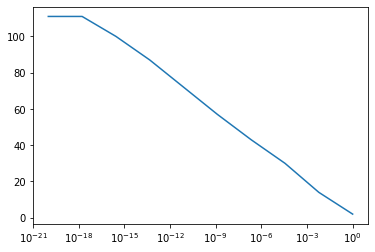

In [286]:
import matplotlib.pyplot as plt

epses = np.logspace(0, -20, 10)
n = np.zeros(epses.size)
for i in range(n.size):
    _, n[i] = seidel(m, b, eps=epses[i])

plt.plot(epses, n)
plt.xscale("log")

Видим, что количество итераций $n$ зависит от лограифма точности $\varepsilon$

# Задача 6

In [289]:
import numba as nb

In [306]:
@nb.njit(nb.float64[:](nb.float64[:, :], nb.float64[:], nb.float64, nb.int32))
def seidel_numba(A, b, eps=1e-10, max_iter=1000):
    b = b
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    x = np.ones(b.shape)
    B = np.linalg.inv(L + D)
    c = B @ b
    for i in range(max_iter):
        x_new = - B @ U @ x + c
        delta = np.linalg.norm(x_new - x)
        x = x_new
        if delta < eps:
            break
    return x

/tmp/ipykernel_7139/1303884613.py:9: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 1d, A))
  c = B @ b
/home/coastal/.local/lib/python3.10/site-packages/numba/core/typing/npydecl.py:913: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))


In [309]:
%%timeit
seidel_numba(m, b, 1e-10, 1000)

170 µs ± 5.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [310]:
%%timeit
seidel(m, b)

1.65 ms ± 39.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Видим, что ускоренный метод в два раза быстрее